---

# Forecasts and predictions project

AIMS: 
- Learn to predict the probability of churn (for the upcoming month) for each customer
- Draw up typical user portraits: select the most outstanding groups and describe their main features
- Analyze the factors that impact churn most
- Draw basic conclusions and develop recommendations on how to improve customer service:
- Identify target groups
- Suggest measures to cut churn
- Describe any other patterns you see with respect to interaction with customers

#### Table of Content:


1 [Downloading the data](#Downloading_the_data)    
2 [Carrying out exploratory data analysis (EDA)](#Carrying_out_exploratory_data_analysis_(EDA))
 - [Looking at the dataset: does it contain any missing features? Study the mean values and standard deviation.](#Looking_at_the_dataset:_does_it_contain_any_missing_features?_Study_the_mean_values_and_standard_deviation.)
 - [Looking at the mean feature values in two groups: for those who left (churn) and for those who stayed.](#Looking_at_the_mean_feature_values_in_two_groups:_for_those_who_left_(churn)_and_for_those_who_stayed.)
 - [Plotting bar histograms and feature distributions for those who left (churn) and those who stayed.](#Plotting_bar_histograms_and_feature_distributions_for_those_who_left_(churn)_and_those_who_stayed.)
 - [Building a correlation matrix and displaying it.](#Building_a_correlation_matrix_and_displaying_it.)
 
3 [Building a model to predict user churn](#Building_a_model_to_predict_user_churn)
 - [Dividing the data into train and validation sets.](#Dividing_the_data_into_train_and_validation_sets.)
 
 - [Training the model on the train set with two methods: logistic regression and random forest.](#Training_the_model_on_the_train_set_with_two_methods:_a_logistic_regression_b_random_forest.)
 
 - [Evaluating accuracy, precision, and recall for both models using the validation data. Comparing the models. Which model gave better results?](#Evaluating_accuracy,_precision,_and_recall_for_both_models_using_the_validation_data._Comparing_the_models._Which_model_gave_better_results?)
 
4 [Creating user clusters](#Creating_user_clusters)

 - [Standardizing the data.](#Standardizing_the_data.)
 - [Building a matrix of distances based on the standardized feature matrix and plotting a dendrogram.](#Building_a_matrix_of_distances_based_on_the_standardized_feature_matrix_and_plotting_a_dendrogram.)
 - [Training the clustering model with the K-means algorithm and predicting customer clusters.](#Training_the_clustering_model_with_the_K-means_algorithm_and_predicting_customer_clusters.)
 - [Looking at the mean feature values for clusters.](#Looking_at_the_mean_feature_values_for_clusters.)
 - [Plotting distributions of features for the clusters.](#Plotting_distributions_of_features_for_the_clusters.)
 - [Calculating the churn rate for each cluster.](#Calculating_the_churn_rate_for_each_cluster.)
 
5 [Conclusions and basic recommendations on working with customers](#Conclusions_and_basic_recommendations_on_working_with_customers)

## Downloading the data

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score


In [2]:
path = '/Users/maja/Downloads/'
data=pd.read_csv(path + 'gym_churn_us.csv')

In [3]:
data.sample()

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
317       0              1        0              0      1                1   

     Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
317             0   28                    109.492524                    1.0   

     Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
317         1                   1.825685                            1.86934   

     Churn  
317      0

The data was read successfully.

## Carrying out exploratory data analysis (EDA)

### Looking at the dataset: does it contain any missing features? Study the mean values and standard deviation.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Looking at the overview of the table, we cannot see any missing values.
There are no `object` type of values in the data set.

In [5]:
data.describe()

gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.000000    27.000000   
50%           1.000000      0.000000    29.000000   
75%           6.000000      1.000000    31.000000   
max          12.000000      1.000000    41.000000   

       Avg_additional_charges_total  Month_to_end_contract     Lifetime  \
count                   4000.000000            4000.000000  4000.000000   
mean                     146.943728               4.322750     3.724750   
std                       96.355602               4.191297     3.749267   
min                        0.148205               1.000000     0.000000   
25%                       68.868830               1.000000     1.000000   
50%                      136.220159               1.000000     3.000000   
75%                      210.949625               6.000000     5.000000   
max                      552.590740              12.000000    31.000000   

       Avg_class_frequency_total  Avg_class_frequency_current_month  \
count                4000.000000                        4000.000000   
mean                    1.879020                           1.767052   
std                     0.972245                           1.052906   
min                     0.000000                           0.000000   
25%                     1.180875                           0.963003   
50%                     1.832768                           1.719574   
75%                     2.536078                           2.510336   
max                     6.023668                           6.146783   

             Churn  
count  4000.000000  
mean      0.265250  
std       0.441521  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

Looking at the different columns, we can evaluate which of the `0` values can be seen as a missing value. In case of some of the categories (`Near_Location`, `Partner`, `Promo_friends`, `Phone`, etc.), 0-1 seem to be representative of yes- no answers, hence, it will not be treated as a missing value. Furthermore, these values represent categorical values.

Additionaly, the values of the standard deviation for different categories shows how spread out the values are. E.g. `Avg_additional_charges_total` shows that the values are widely spread out from the mean, hence we can expect some outliers in this category.  

### Looking at the mean feature values in two groups: for those who left (churn) and for those who stayed.

In [6]:
users_by_churn=data.groupby(by='Churn').mean()
users_by_churn

gender  Near_Location   Partner  Promo_friends     Phone  \
Churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       Contract_period  Group_visits        Age  Avg_additional_charges_total  \
Churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
Churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       Avg_class_frequency_current_month  
Churn                                     
0                               2.027882  
1                               1.044546

Looking at the different mean values for those who left and remained, we can see that: 
1. Those who have left (`Churn`=1) have shorter `Contract_period`, `Lifetime`,  than those who remain (`Churn`=0);
2. Those who are staying have higher `Avg_additional_charges_total` than those who remained.

### Plotting bar histograms and feature distributions for those who left (churn) and those who stayed.

Before plotting the feature distribution for the users who left and stayed, we will divide the data in `Categorical` and `Numerical` values in order to make visualization clearer.

In [7]:
data_numerical=data.filter(['Age','Lifetime','Avg_additional_charges_total','Month_to_end_contract','Avg_class_frequency_total','Avg_class_frequency_current_month'], axis=1)


In [8]:
for i in data_numerical.columns:
        fig = px.histogram(data, x=i, color="Churn")
        fig.update_layout(title_text=i, barmode="overlay")
        fig.show()

Looking at the graphs of the numerical data, it can be noticed that:

a) the youngest users tend to leave whereas the oldest tend to stay;

b) `Lifetime` distribution of users who left is extremely skewed to the right, whereas the users who stay have a bit more spread out distribution;

c) users who left pay less additional charges than those who stay;

d) vast majority of users who are about to leave have 1 month left till the end of the contract;

e) Users who stay have higher average class frequency;

f) Many users who are about to leave do not attend classes in the last month. 

In [9]:
data_categorical=data.drop(['Age', 'Lifetime','Avg_additional_charges_total','Month_to_end_contract','Avg_class_frequency_total','Avg_class_frequency_current_month'], axis=1)

In [10]:
data_categorical.head()

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Churn  
0             1      0  
1             1      0  
2             0      0  
3             1      0  
4             0      0

In [11]:
for i in data_categorical.columns:
        fig = px.histogram(data.sort_values(by='Churn'), x=i, color="Churn")
        fig.update_layout(title_text=i)
        fig.update_layout(bargap=0.2)
        fig.show()

Looking at the categorical data we can see that:

a) there is an equal amount of male and female users and leave-stay proportion amongst them is equal;

b) almost half of the users who live far leaves, whereas majority those who live close stay;

c) higher percentage of users who are not employees of partner companies leave, those who are employees of partner companies tend to stay;

d) most of the users who sign up through a friend stay;

f) 10 times more users provide their phone number, it does not seem to affect whether a user stays or leaves;

g) 40% of people on 1 month contract leave, almost all people on a 12 month contract stay;

h) 2/3 of users who are leaving did not take part in group sessions;

i) Almost 3 times more users stay.

### Building a correlation matrix and displaying it.

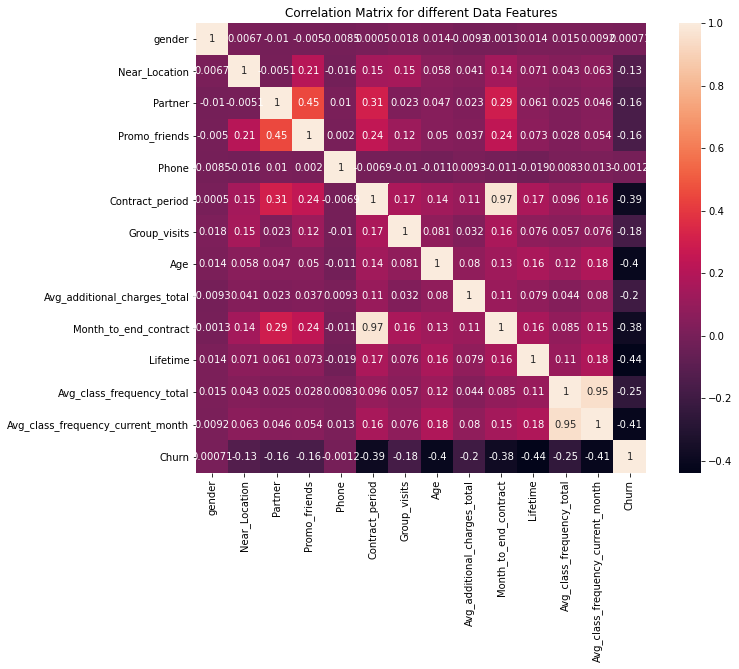

In [12]:
cm = data.corr() 
fig, ax = plt.subplots()


sns.heatmap(cm, annot = True, square=True)
fig.set_size_inches(11.7, 8.27)
plt.title('Correlation Matrix for different Data Features')
plt.show()

Looking at the Correlation table, the strongest interdependencies are visible between:
    a) `Promo_friends` and `Partner` features- directly proportional,
    b) `Lifetime` and `Avg_class_frequency_current_month` - counter proportional to `Churn` value. 

### Conclusion: 

Throughout the Exploratory Data Analysis, it was found out that:

- features mentioned in the data frame are of categorical and numerical character;

- mean values of features for users who left and remained show that a)Those who have left (Churn=1) have shorter Contract_period, Lifetime, than those who remain (Churn=0); b)Those who are staying have higher Avg_additional_charges_total than those who remained.

- users who leave are likely among the youngest users, have the shortest `Lifetime`, pay less additional charges, usually have around a month till the end of the contract, have lower average class frequency and do not attend classes in the last month.

- users who stay most likely live near, are employees of partner companies, often sign up through a friend, often have 6 and 12 months cntracts, take part in group sessions.

- almost 3times more users stay than leave.

- the higher `Lifetime` and `Avg_class_frequency_current_month`, the more likely user is to stay.

## Building a model to predict user churn

### Dividing the data into train and validation sets.

In [13]:
X = data.drop('Churn', axis=1)
y = data['Churn']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Training the model on the train set with two methods: a logistic regression b  random forest.

In [15]:
lr_model = LogisticRegression(random_state=0)

lr_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)

lr_probabilities = lr_model.predict_proba(X_test)

/Users/maja/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [16]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)

### Evaluating accuracy, precision, and recall for both models using the validation data. Comparing the models. Which model gave better results?

In [17]:
def print_all_metrics(y_true, y_pred, y_proba, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))


In [18]:
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Metrics for logistic regression:')
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Metrics for random forest:')


Metrics for logistic regression:
	Accuracy: 0.91
	Precision: 0.83
	Recall: 0.79
Metrics for random forest:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.82


After evaluating accuracy, precision, and recall for both model we can see that Logistic regression model gives better results than Random Forest. 

## Creating user clusters

### Standardizing the data.

In [19]:
sc = StandardScaler()
x_sc = sc.fit_transform(data.drop(columns = ['Churn']))

### Building a matrix of distances based on the standardized feature matrix and plotting a dendrogram.

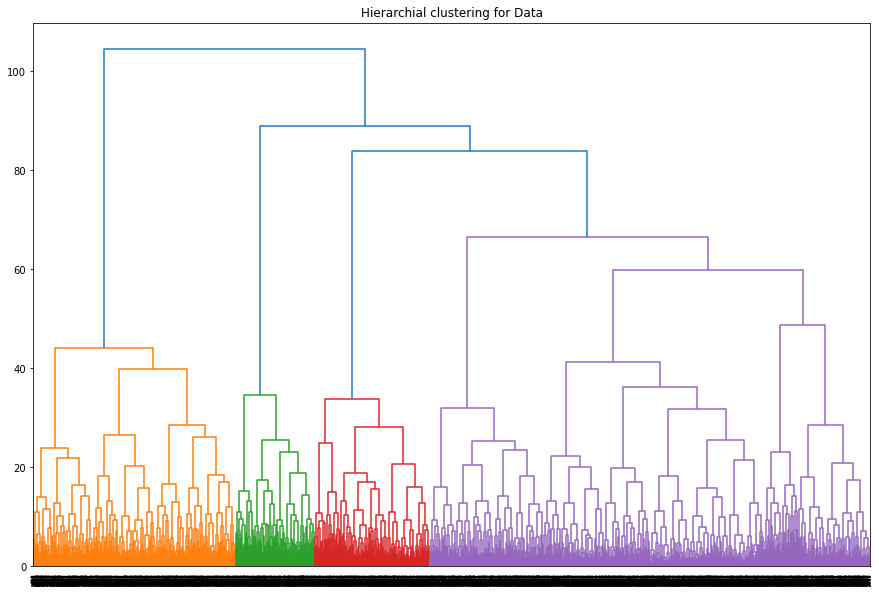

In [20]:
linked = linkage(x_sc, method = 'ward')
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top') 
plt.title('Hierarchial clustering for Data') 
plt.show()

Looking at the dendogram above we can clearly see 4 different clusters appearing.

### Training the clustering model with the K-means algorithm and predicting customer clusters.

In [21]:

km = KMeans(n_clusters = 4) 
labels = km.fit_predict(x_sc) 

In [22]:
silhouette_score(x_sc, labels)

0.13481599290395382

In [23]:
data['cluster_km']=labels

### Looking at the mean feature values for clusters.

In [24]:
data_by_cluster=data.groupby(['cluster_km']).mean()

In [25]:
data_by_cluster

gender  Near_Location   Partner  Promo_friends  Phone  \
cluster_km                                                            
0           0.523316       0.862694  0.471503       0.305699    0.0   
1           0.487919       0.759060  0.379195       0.189262    1.0   
2           0.544847       0.863550  0.347328       0.209924    1.0   
3           0.502788       0.940520  0.776952       0.570632    1.0   

            Contract_period  Group_visits        Age  \
cluster_km                                             
0                  4.777202      0.427461  29.297927   
1                  1.887919      0.290604  28.052349   
2                  2.425573      0.452290  30.024809   
3                 10.711896      0.536245  29.892193   

            Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
cluster_km                                                                  
0                             144.208179               4.466321  3.940415   
1                             129.503113               1.793960  2.234899   
2                             158.132756               2.259542  4.745229   
3                             161.178241               9.782528  4.716543   

            Avg_class_frequency_total  Avg_class_frequency_current_month  \
cluster_km                                                                 
0                            1.854211                           1.723967   
1                            1.215197                           0.962150   
2                            2.732593                           2.721214   
3                            1.975793                           1.967769   

               Churn  
cluster_km            
0           0.266839  
1           0.559732  
2           0.087786  
3           0.029740

The table shows different mean values for features for the clusters. In order to see the differences clearer, the distribution of features will be visualised.

### Plotting distributions of features for the clusters. 

For clearer visualisation, we will divide the data into numerical and categorical including the different clusters.

In [26]:
data_numerical=data.filter(['Age','Lifetime','Avg_additional_charges_total','Month_to_end_contract','Avg_class_frequency_total','Avg_class_frequency_current_month','cluster_km'], axis=1)


<function matplotlib.pyplot.show(close=None, block=None)>

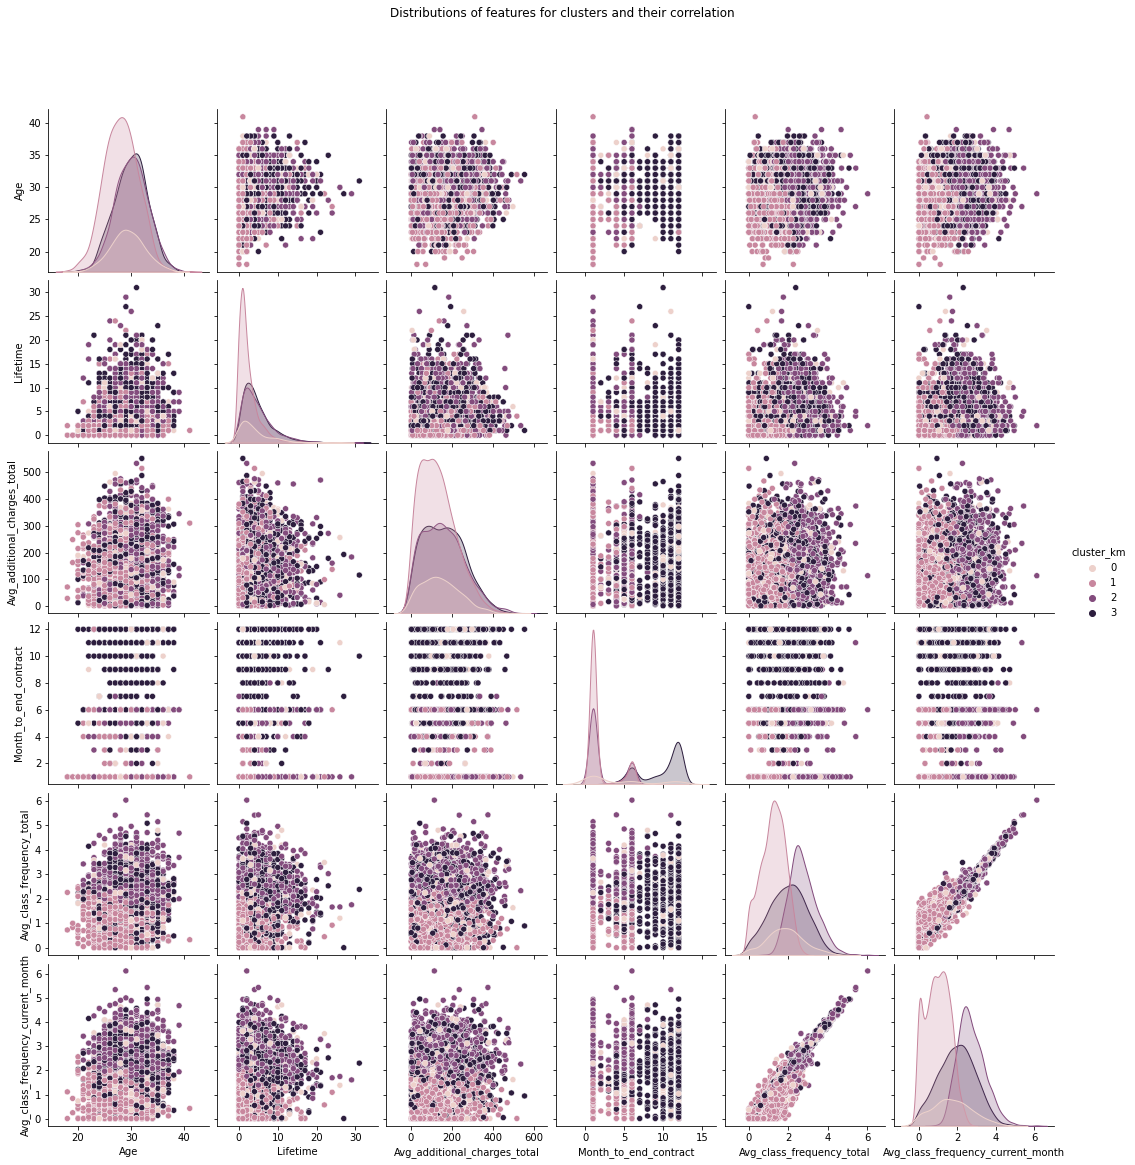

In [27]:

pairplot=sns.pairplot(data_numerical, hue='cluster_km')
pairplot.fig.suptitle("Distributions of features for clusters and their correlation", y=1.08)
plt.show

In [28]:
data_categorical=data.drop(['Age', 'Lifetime','Avg_additional_charges_total','Month_to_end_contract','Avg_class_frequency_total','Avg_class_frequency_current_month'], axis=1)

In [29]:
for i in data_categorical.columns:
        fig = px.histogram(data.sort_values(by='cluster_km'), x=i, color="cluster_km")
        fig.update_layout(title_text=i)
        fig.update_layout(bargap=0.2)
        fig.show()

Looking at the visualisation, we can notice that: 

1. More than half of the users who live far belong to Cluster 0,

2. Overwhelming majority of Cluster 2 are employees of Partnerig companies,

3. Vast majority of cluster 0 and 1 did not joint through a Friend,

4. None of the Cluster 3 users provided their phone n.

5. 90% of 12 month contract users are from Cluster 2.

6. Almost all of the cluster 2 and 1 users remained.

7. The least users where classified in cluster 3, whereas the most in cluster 0.

### Calculating the churn rate for each cluster.

In [30]:
data_by_cluster['Churn']

cluster_km
0    0.266839
1    0.559732
2    0.087786
3    0.029740
Name: Churn, dtype: float64

After calculating the average churn rate for each cluster, we can see that users from cluster 2 were the most likely to stay, followed by the users from cluster 1. Users from cluster 3 on the other hand were less likely to stay with cluster 0 being the least likley to stay.

## Conclusions and basic recommendations on working with customers


Throughout the analysis, we found out that: 

- features mentioned in the data frame are of categorical and numerical character;

- mean values of features for users who left and remained show that a)Those who have left (Churn=1) have shorter Contract_period, Lifetime, than those who remain (Churn=0); b)Those who are staying have higher Avg_additional_charges_total than those who remained.

- users who leave are likely among the youngest users, have the shortest Lifetime, pay less additional charges, usually have around a month till the end of the contract, have lower average class frequency and do not attend classes in the last month.

- users who stay most likely live near, are employees of partner companies, often sign up through a friend, often have 6 and 12 months cntracts, take part in group sessions.

- almost 3times more users stay than leave.

- the higher Lifetime and Avg_class_frequency_current_month, the more likely user is to stay.

- Linear Regression performed better as a model to predict users churn. 

- The users were divided into 4 main clusters. 

- Users from cluster 0 live far, had the highest lifetime, did not join through a friend and were the the biggest cluster, had the lowest average class frequency and the highest additional charges.

- Users from cluster 1 did not join through a friend and were more likely to remain and had the highest average class frequency.

- Users from cluster 2 were employees of partnering companies, joined the gym on a 12 month contract, had the highest number of months left before the end of the contract and did not leave.

- Users from cluster 3 did not provide their phone number, were the least numerous group and had the second highest additional charges.


It turns out that the users who perform the best in terms of churn are employees of partnering companies and often sign up through a friend, hence it is recommended to expand the list of partnering companies and promotional campaigns like "Bring a friend";

Surprisingly, the users who did not show high average class frequency and did not provide their phone number are very profitable as they had the highest additional charges;

People joing classes with high frequency are likely to remain.


It will be recommended to explore deeper the interdependencies between different categories and relative values for each cluster for a more precise analysis and churn predicitions. 